In [1]:
#Import the fpga util file with all wrapper functions
import fpga_utils as fpga
import pandas as pd

['/home/centos/ml-suite/notebooks/pickle', '/home/centos/ml-suite/notebooks/parallel', '/home/centos/ml-suite/notebooks/bin', '/home/centos/ml-suite/notebooks/version', '/home/centos/ml-suite/notebooks/weights', '/home/centos/ml-suite/notebooks/optimizations', '/home/centos/ml-suite/notebooks/network', '/home/centos/ml-suite/notebooks/memory', '/home/centos/ml-suite/notebooks/graph', '/home/centos/ml-suite/notebooks/codegeneration', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../weights', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../version', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../tests', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../pickle', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../parallel', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../optimizations', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../network', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../memory', '/home/centos/ml-suite/xfdnn/tools/compile/bin/../graph', '/home/centos/ml-suite

In [2]:
#Provide the Model checkpoint path
sProtoBufPath="/home/centos/models/caffe/inception_v3/fp32/inception_v3_without_bn"

# Initialize the array to store results
Inference_Data =[]

# Quantization Mode - 8 bit or 16 bit
Q_MODE = 16

# Number of images we want to carry inference on
NUM_IMAGES = 256

# Paramaeter to do recompile or use existing compiled model
DO_COMPILE = False

# Model Type = 'Tensorflow,Caffe'
MODEL_TYPE = 'Caffe'

#Execute  the model on FPGA
Inference_Data = fpga.executeOnFPGA(sProtoBufPath,Q_MODE,Inference_Data,NUM_IMAGES,DO_COMPILE,MODEL_TYPE)

#Converting to Pandas format for easier plotting and functions.
Inference_Data = pd.DataFrame(Inference_Data)

#Calculate Mean and std
Aggregated_Results = fpga.doAggregations(Inference_Data)

#Save the data locally
Aggregated_Results.to_csv('inception_v3_'+str(Q_MODE)+'bit.csv')
#Inference_Data.to_csv('inference_'+str(q_Mode)+'.csv')

Namespace(anew='work/opt_inception_model', approximate=False, banditpre=None, barrier=False, bridges=None, bytesperpixels=2, concatstrategy=None, conv_1x1_s2=False, cpulayermustgo=False, darius=None, ddr=256, dedicateddsp=None, deephifilename=None, dsp=56, forceweights=None, fromtensorflow=False, generatefile='work/fpga_inception_v3.cmds', godreplication=None, lasttensorbyname=None, loadpickle=None, manasadebugmode=False, memory=5, networkfile='/home/centos/models/caffe/inception_v3/fp32/inception_v3_without_bn_deploy.prototxt', nodynamicscaling=False, noreplication=False, parallelism=False, parallelismstrategy="['bottom', 'tops']", parallelread=None, phase='TEST', pipelineconvmaxpool=False, pngfile=None, poolingaround=False, rankdir='BT', savepickle=None, schedulefile=None, strategy='all', verbose=False, versionjson=None, weights='/home/centos/models/caffe/inception_v3/fp32/inception_v3_without_bn.caffemodel')
Network: /home/centos/models/caffe/inception_v3/fp32/inception_v3_without_b

In [3]:
#Print execution results
Aggregated_Results

,batchSize_,imgsPerSecAll_mean,imgsPerSecAll_std,experiment_max,imgsPerSecAll_max,imgsPerSecAll_min
0,1,34.966400,1.311929,16_bit_mode,36.278329,33.654472
1,2,40.638331,0.834219,16_bit_mode,41.472550,39.804112
2,4,44.105212,0.114800,16_bit_mode,44.220012,43.990411
3,8,46.090740,0.246923,16_bit_mode,46.337663,45.843817
4,16,46.555306,0.171660,16_bit_mode,46.726965,46.383646
5,32,48.287137,0.060055,16_bit_mode,48.347193,48.227082
6,64,48.486427,0.218814,16_bit_mode,48.705242,48.267613


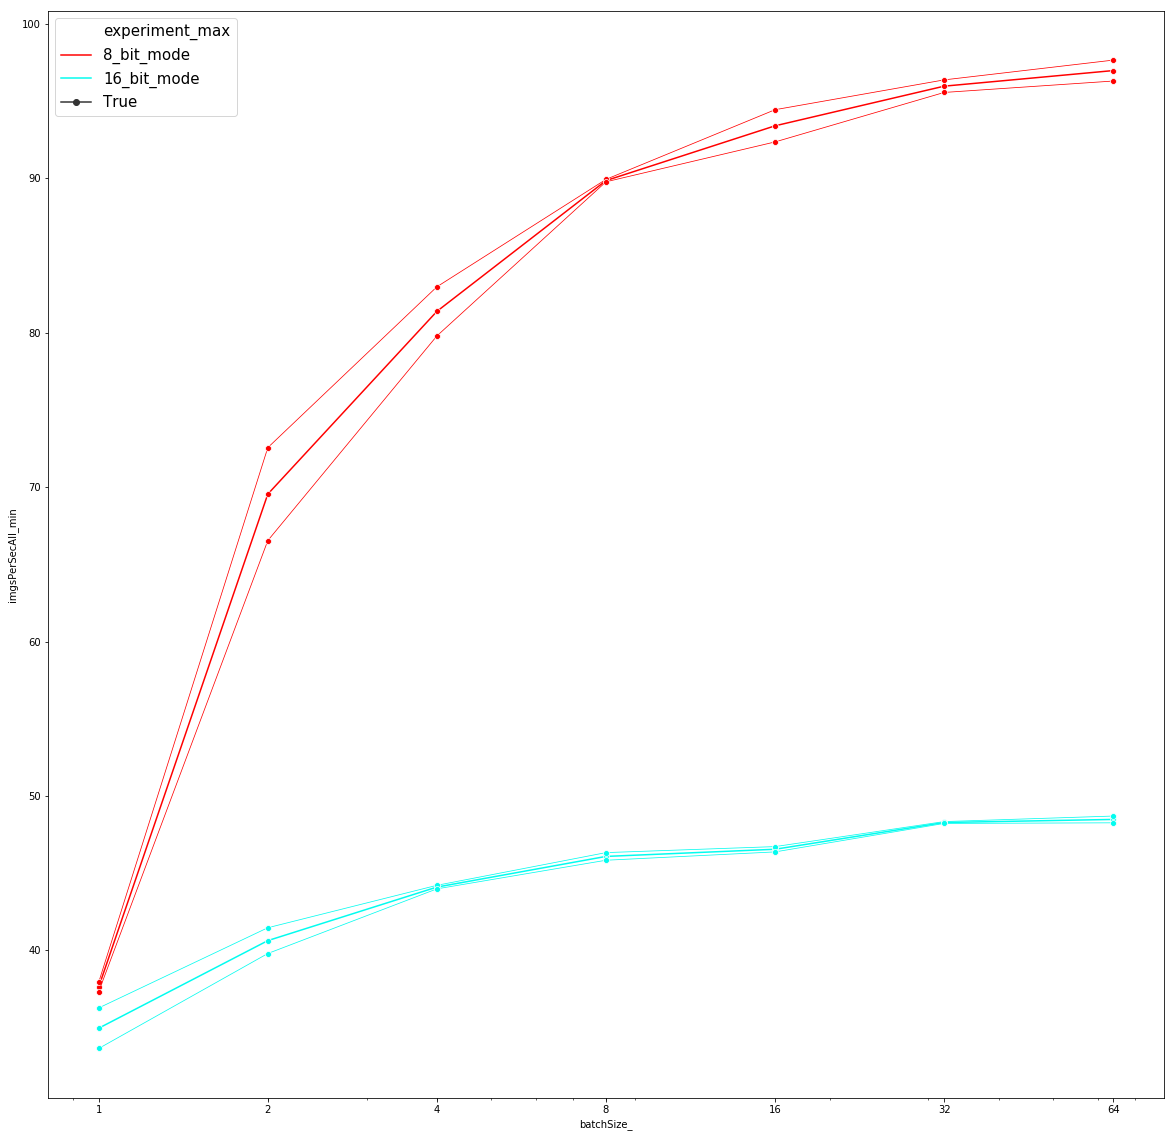

In [4]:
fpga.plotSingleModelInference('inception_v3')

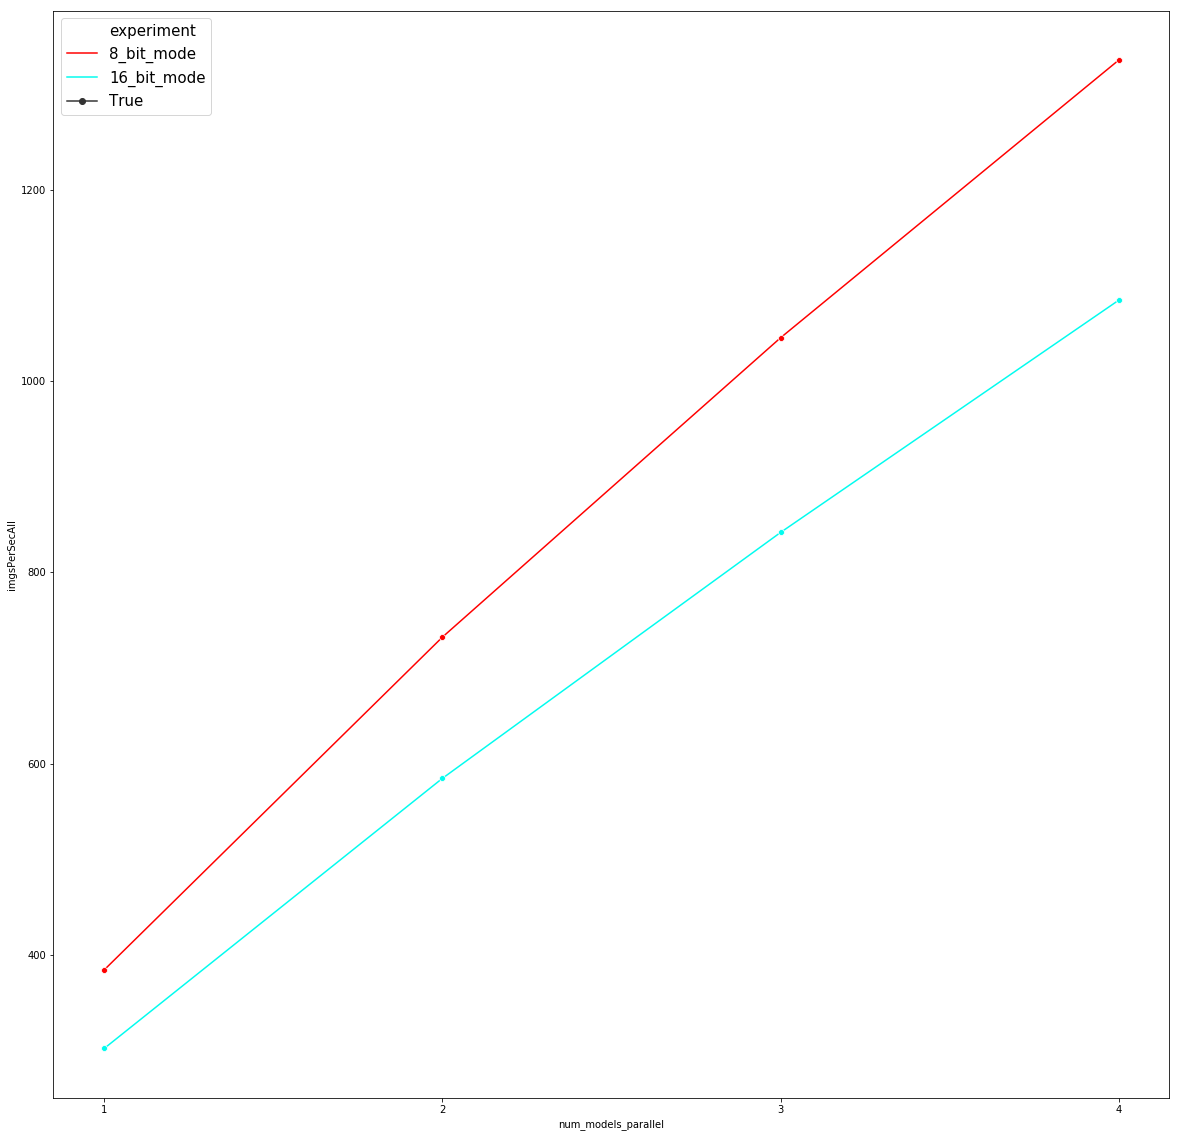

In [5]:
fpga.plotMultiModelInference()